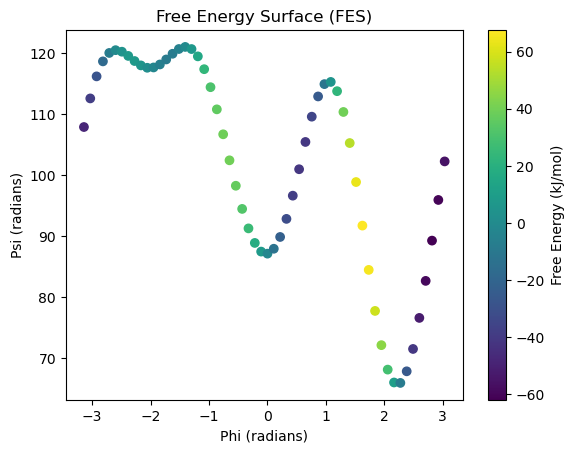

In [2]:
import numpy as np
import matplotlib.pyplot as plt

grid_data = np.loadtxt('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Output/ala2.grid.dat', skiprows=1)
phi_vals = grid_data[:, 0]
psi_vals = grid_data[:, 1]
energy_vals = -grid_data[:, 2]

plt.scatter(phi_vals, psi_vals, c=energy_vals, cmap='viridis')
plt.colorbar(label='Free Energy (kJ/mol)')
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Free Energy Surface (FES)')
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Figures/ala2_FES_plot.png')


plt.show()

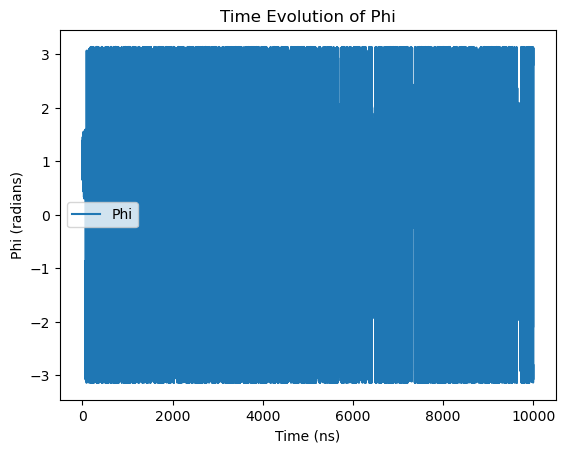

In [3]:
import numpy as np
import matplotlib.pyplot as plt

colvar_data = np.loadtxt('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Output/ala2_metad_biasfactor10_pace500_height1.2_sigma0.55,0.344_10ns.colvar.txt', comments='#')
time = colvar_data[:, 0]  
phi_values = colvar_data[:, 1]

plt.plot(time, phi_values, label='Phi')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (radians)')
plt.title('Time Evolution of Phi')
plt.legend()
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Figures/ala2_Time Evolution of Phi.png')

plt.show()

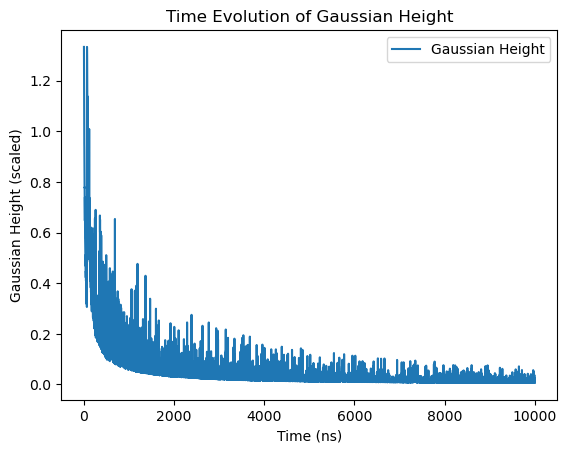

In [4]:
hills_data = np.loadtxt('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Output/ala2_metad_biasfactor10_pace500_height1.2_sigma0.55,0.344_10ns.hills.txt', comments='#')
time_hills = hills_data[:, 0]
height = hills_data[:, 3]

plt.plot(time_hills, height, label='Gaussian Height')
plt.xlabel('Time (ns)')
plt.ylabel('Gaussian Height (scaled)')
plt.title('Time Evolution of Gaussian Height')
plt.legend()
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Figures/ala2_Time Evolution of Gaussian Height.png')

plt.show()

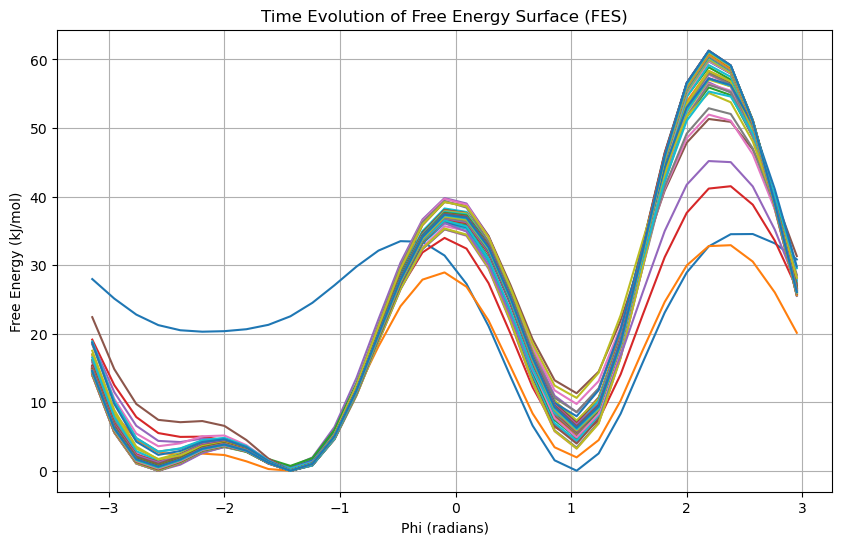

In [5]:
import glob

fes_files = sorted(glob.glob('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Output/ala2_metad_biasfactor10_pace500_height1.2_sigma0.55,0.344_10ns.fes.dat/fes_time_B.*.dat'))

plt.figure(figsize=(10, 6))

for file in fes_files:
    fes_data = np.loadtxt(file, comments='#')
    phi = fes_data[:, 0]
    energy = fes_data[:, 1]
    plt.plot(phi, energy, label=file)

plt.xlabel('Phi (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Time Evolution of Free Energy Surface (FES)')
#plt.legend()
plt.grid()
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Figures/ala2_Time Evolution of FES.png')

plt.show()

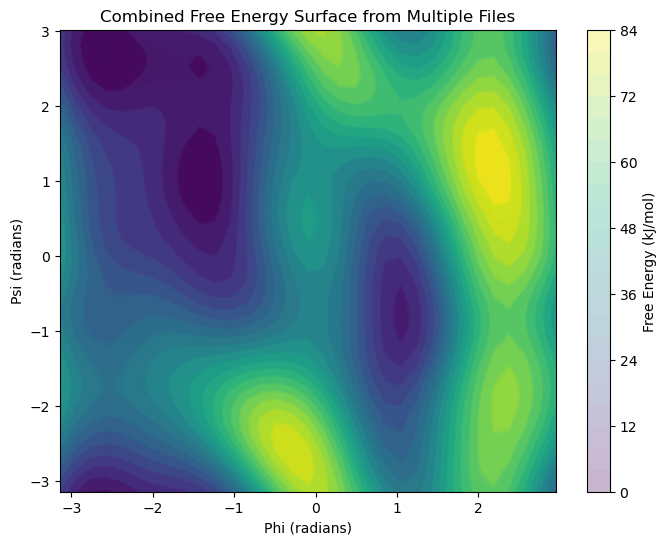

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob

fes_files = sorted(glob.glob('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Output/ala2_2d_metad_biasfactor10_pace500_height1.2_sigma0.55,0.344_10ns.fes.dat/2d_fes.*.dat'))

fes_data = np.loadtxt(fes_files[0])
phi = np.unique(fes_data[:, 0])
psi = np.unique(fes_data[:, 1])
X, Y = np.meshgrid(phi, psi)

plt.figure(figsize=(8, 6))

for filename in fes_files:
    fes_data = np.loadtxt(filename)
    Z = fes_data[:, 2].reshape(len(psi), len(phi))

    plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.3)

plt.colorbar(label='Free Energy (kJ/mol)')
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Combined Free Energy Surface from Multiple Files')
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week6/Metadynamics/lugano/Figures/ala2_Combined FES from Multiple Files.png')

plt.show()